# Pytorch Workflow

In [114]:
import torch 
from torch import nn  # neural network
import matplotlib.pyplot as plt

torch.__version__ 

'2.1.0+cu121'

## 1. Data preparing and loading

Using linear regression formula as data

In [115]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) # unsqueeze(1) adds a dimension to the tensor
y = weight * X + bias
len(X), len(y)

(50, 50)

### Split the data into training and test sets

In [116]:
train_size = int(len(X) * 0.8)
XTrain, yTrain = X[:train_size], y[:train_size]
XTest, yTest = X[train_size:], y[train_size:]

### Visualize Data

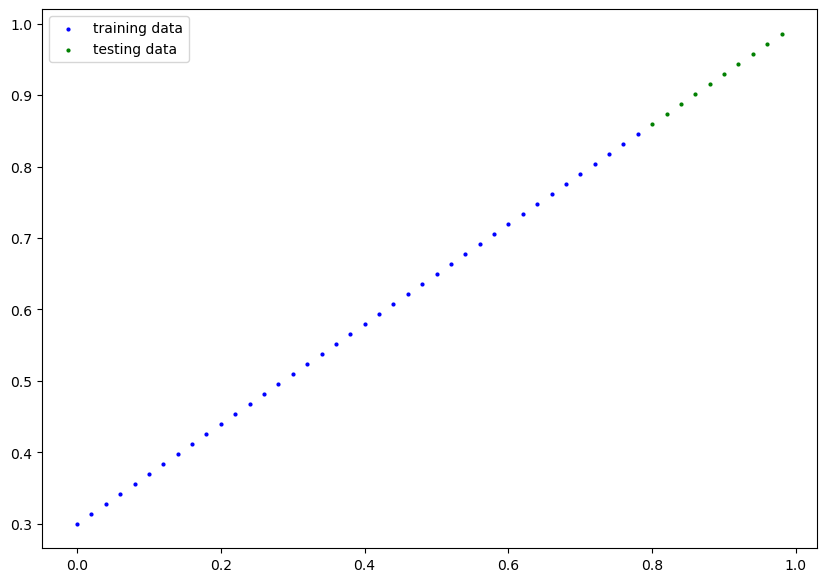

In [117]:
def plotPredictions(trainData, trainLabels, testData, testLabels, predicted=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(trainData.numpy(), trainLabels.numpy(), s = 4, color='blue', label='training data')
    plt.scatter(testData.numpy(), testLabels.numpy(), s = 4, color='green', label='testing data')
    if predicted is not None:
        plt.scatter(testData.numpy(), predicted.numpy(), s = 4, color='red', label='predictions')
    plt.legend()
    plt.show()

plotPredictions(XTrain, yTrain, XTest, yTest)

## 2. Build Model

In [118]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
                
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x: training data
        return self.weights * x + self.bias  # linear regression model

In [119]:
# Create a random seed
torch.manual_seed(42)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [120]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [121]:
with torch.inference_mode():
    yPreds = model0(XTest)
yPreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

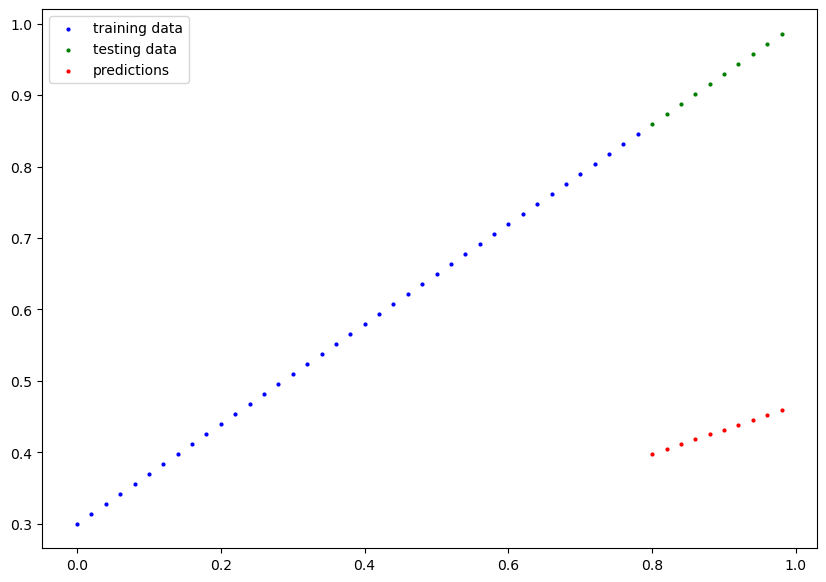

In [122]:
plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)

In [123]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model0.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Build a training loop in pytorch

In [127]:
epochs = 10000

# loop through the data
for epoch in range(epochs):
    model0.train()
    y_pred = model0(XTrain)
    loss = loss_fn(y_pred, yTrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        test_pred = model0(XTest)
        test_loss = loss_fn(test_pred, yTest)
    if epoch % 100 == 0:
        print(
            f'Epoch {epoch + 1} | Training Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}')

Epoch 1 | Training Loss: 0.0209 | Test Loss: 0.0488
Epoch 101 | Training Loss: 0.0175 | Test Loss: 0.0408
Epoch 201 | Training Loss: 0.0141 | Test Loss: 0.0328
Epoch 301 | Training Loss: 0.0106 | Test Loss: 0.0248
Epoch 401 | Training Loss: 0.0072 | Test Loss: 0.0167
Epoch 501 | Training Loss: 0.0038 | Test Loss: 0.0087
Epoch 601 | Training Loss: 0.0003 | Test Loss: 0.0006
Epoch 701 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 801 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 901 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1001 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1101 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1201 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1301 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1401 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1501 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1601 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1701 | Training Loss: 0.0004 | Test Loss: 0.0006
Epoch 1801 | Training 

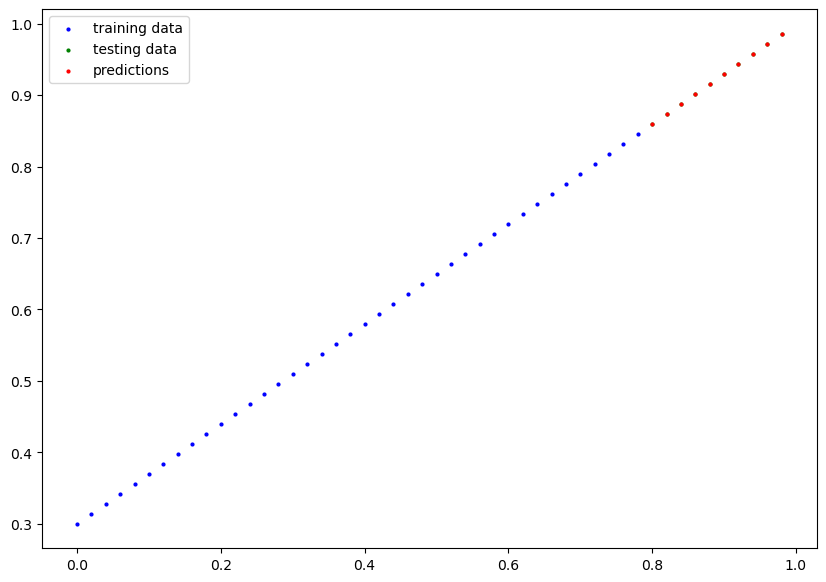

In [128]:
with torch.inference_mode():
    yPreds = model0(XTest)
plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)